In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

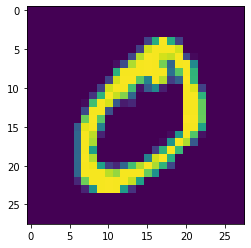

In [ ]:
plt.imshow(X_train[1])

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 224s 119ms/step - loss: 0.1839 - accuracy: 0.9562 - val_loss: 0.0733 - val_accuracy: 0.9797
Epoch 2/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0611 - accuracy: 0.9812 - val_loss: 0.0702 - val_accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0430 - accuracy: 0.9862 - val_loss: 0.0820 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0896 - val_accuracy: 0.9784
Epoch 5/5
1875/1875 [==============================] - 207s 110ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.1091 - val_accuracy: 0.9791


In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10911186784505844, 0.9790999889373779]


In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 103ms/step
[[9.3748250e-18 3.5704835e-23 5.2065307e-15 7.8973703e-12 3.3665531e-24
  7.4246703e-19 3.6026280e-27 1.0000000e+00 3.3415113e-18 3.7415195e-16]
 [6.2928890e-15 8.4833331e-15 1.0000000e+00 1.5812116e-14 1.9860809e-18
  8.9741310e-25 1.5445588e-11 4.3880426e-27 4.9763194e-15 9.5195230e-24]
 [3.8400599e-11 9.9985909e-01 1.2870648e-04 1.0662235e-12 9.2012242e-06
  2.0023130e-07 1.4547338e-11 1.8477264e-09 2.7287676e-06 1.6505697e-10]
 [9.9995840e-01 9.1778229e-14 1.9572359e-09 5.6947910e-15 6.9999914e-13
  1.5889724e-11 2.4026441e-08 1.3196146e-16 2.2692620e-11 4.1657124e-05]]


In [ ]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
model.save("model.h5")
model=load_model("model.h5")